In [38]:
import os
import requests as req
import seaborn as sns
import hypertools as hyp
import pandas as pd
import numpy as np
from downloader import download_file_from_google_drive as dl
import html2text
import markdown
from bs4 import BeautifulSoup
from scipy.spatial.distance import cdist, pdist, squareform

%matplotlib inline

In [2]:
fileid = '1hCCn31z4HM4IzQi59DP-vvUpYKhlvo2S'
datadir = 'data'
fname = os.path.join(datadir, 'data.csv')

if not os.path.exists(datadir):
    os.makedirs(datadir)
    
if not os.path.exists(fname):
    print('Fetching file from the interwebz!')
    dl(fileid, fname)
else:
    print('Data found!')

Data found!


In [3]:
data = pd.read_csv(fname)

In [4]:
data.head()

,id,title,url,writers,genres,script
0,1,10 Things I Hate About You,http://www.imsdb.com/scripts/10-Things-I-Hate-...,Karen McCullah Lutz;Kirsten Smith;William Shak...,Comedy;Romance,\n\n\n<b><!--\n</b>if (window!= top)\ntop.loca...
1,2,12,http://www.imsdb.com/scripts/12.html,Lawrence Bridges,Comedy,\n\n \n 12 - Script\n
2,3,12 and Holding,http://www.imsdb.com/scripts/12-and-Holding.html,Anthony Cipriano,Drama,\n \n \n ...
3,4,12 Monkeys,http://www.imsdb.com/scripts/12-Monkeys.html,David Peoples;Janet Peoples,Drama;Sci-Fi;Thriller,\n\n\n<b><!--\n</b>if (window!= top)\ntop.loca...
4,5,12 Years a Slave,http://www.imsdb.com/scripts/12-Years-a-Slave....,John Ridley,Drama,\r\n\r\n\r\n 12 YE...


In [20]:
def wipe_formatting(script, rehtml=False):
    parser = html2text.HTML2Text()
    parser.wrap_links = True
    parser.skip_internal_links = True
    parser.inline_links = True
    parser.ignore_anchors = True
    parser.ignore_images = True
    parser.ignore_emphasis = True
    parser.ignore_links = True
    text = parser.handle(script)
    text = text.strip(' \t\n\r')
    if rehtml:
        text = text.replace('\n', '<br/>')
        text = text.replace('\\', '')
    md = markdown.markdown(text)
    soup=BeautifulSoup(md,'html5lib')
    soup=soup.get_text()
    soup = soup.replace('\n', ' ')
    return soup

def sliding_window(script, n=100, delim=' '):
    words = wipe_formatting(script).split(delim)
    x = []
    for i in np.arange(len(words)-n):
        x.append(delim.join(words[i:(i+n)]))
    return x
    

In [44]:
x = sliding_window(data.iloc[0]['script'], n=200)

In [45]:
x[0]

'Ten Things I Hate About You - by Karen McCullah Lutz & Kirsten Smith TEN THINGS I HATE ABOUT YOU written by Karen McCullah Lutz & Kirsten Smith based on \'Taming of the Shrew" by William Shakespeare Revision November 12, 1997 PADUA HIGH SCHOOL - DAY Welcome to Padua High School,, your typical urban- suburban high school in Portland, Oregon. Smarties, Skids, Preppies, Granolas. Loners, Lovers, the In and the Out Crowd rub sleep out of their eyes and head for the main building. PADUA HIGH PARKING LOT - DAY KAT STRATFORD, eighteen, pretty -- but trying hard not to be -- in a baggy granny dress and glasses, balances a cup of coffee and a backpack as she climbs out of her battered, baby blue \'75 Dodge Dart. A stray SKATEBOARD clips her, causing her to stumble and spill her coffee, as well as the contents of her backpack. The young RIDER dashes over to help, trembling when he sees who his board has hit. RIDER Hey -- sorry. Cowering in fear, he attempts to scoop up her scattered belongings.

In [46]:
x[1]

'Things I Hate About You - by Karen McCullah Lutz & Kirsten Smith TEN THINGS I HATE ABOUT YOU written by Karen McCullah Lutz & Kirsten Smith based on \'Taming of the Shrew" by William Shakespeare Revision November 12, 1997 PADUA HIGH SCHOOL - DAY Welcome to Padua High School,, your typical urban- suburban high school in Portland, Oregon. Smarties, Skids, Preppies, Granolas. Loners, Lovers, the In and the Out Crowd rub sleep out of their eyes and head for the main building. PADUA HIGH PARKING LOT - DAY KAT STRATFORD, eighteen, pretty -- but trying hard not to be -- in a baggy granny dress and glasses, balances a cup of coffee and a backpack as she climbs out of her battered, baby blue \'75 Dodge Dart. A stray SKATEBOARD clips her, causing her to stumble and spill her coffee, as well as the contents of her backpack. The young RIDER dashes over to help, trembling when he sees who his board has hit. RIDER Hey -- sorry. Cowering in fear, he attempts to scoop up her scattered belongings. KAT

In [27]:
y = hyp.tools.format_data(x)

/usr/local/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 51 separate connected components using meta-embedding (experimental)
  n_components


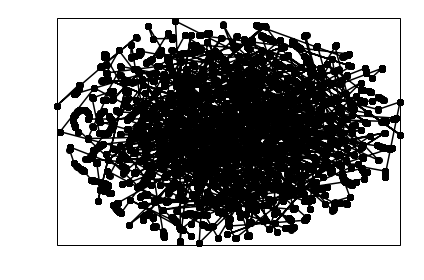

In [33]:
hyp.plot(y, 'ko-', reduce='UMAP', ndims=2)

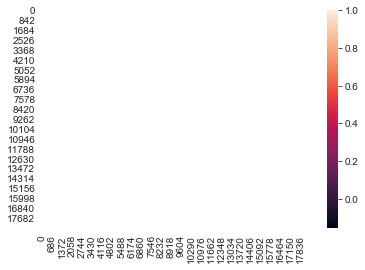

In [39]:
sns.heatmap(1 - squareform(pdist(y[0], 'correlation')))

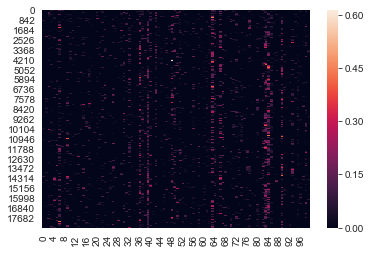

In [41]:
sns.heatmap(y[0])